In [34]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image as PIL_Image
import requests
from io import StringIO, BytesIO
from visual_genome import api

In [51]:
ids = api.get_all_image_ids()

In [52]:
print(ids[1])

2


In [53]:
# ids = api.GetImageIdsInRange(startIndex=2000, endIndex=2010)
# print(ids)

In [55]:
pic_id = 10
image = api.get_image_data(id=pic_id)
print(image)

id: 10, coco_id: -1, flickr_id: -1, width: 800, url: https://cs.stanford.edu/people/rak248/VG_100K/10.jpg


In [56]:
regions = api.get_region_descriptions_of_image(id=pic_id)
print(regions[0])

id: 1427, x: 37, y: 491, width: 78,height: 49, phrase: headphones are on the desk, image: 10


In [57]:
# graph = api.get_scene_graph_of_image()
# print(graph)

In [63]:
for region in regions:
    print(str(region.id) + " " +str(region.x) + " " + str(region.y) + " " + 
          str(region.width) + " " + str(region.height) + " " +
          str(region.phrase))

1427 37 491 78 49 headphones are on the desk
1428 197 534 134 64 a black charger is on the cable
1429 350 439 174 123 cpus are on the floor
1431 81 203 77 146 the wall is green
1477 21 486 110 57 Headphones laying on table
1478 136 140 120 152 Cork board hanging on the wall
1479 534 350 148 226 Red and blue jacket hanging on back of chair
1480 352 439 176 125 Two computer towers sitting on the floor
1481 419 151 174 354 Wood bookshelf leaning against the wall
1527 464 358 101 153 papers are below on the shelf
1528 52 444 51 38 blue cup is on the table
1529 70 377 138 59 papers on the desk are scattered
1530 574 356 117 201 mans jackets are touching the floor
1531 658 368 61 46 man has folded his sleeves
1577 221 455 150 141 white wires are under the desk
1578 216 529 78 44 black charger is on the extention
1579 490 346 200 193 a red and blue jackets were the man is
1580 269 370 22 51 a water bottle on the desk
1581 445 151 176 136 books are on the self
1627 145 144 104 158 a blank pict

In [73]:
def visualize_regions(image, regions):
    response = requests.get(image.url)
    img = PIL_Image.open(BytesIO(response.content))
    plt.imshow(img)
    ax = plt.gca()
    for region in regions:
        ax.add_patch(Rectangle((region.x, region.y),
                               region.width,
                               region.height,
                               fill=False,
                               edgecolor='red',
                               linewidth=3))
        ax.text(region.x, region.y, region.phrase, style='italic', bbox={'facecolor':'white', 'alpha':0.7, 'pad':10})
    fig = plt.gcf()
    plt.tick_params(labelbottom='off', labelleft='off')
    plt.show()

/home/jugs/anaconda3/envs/myenv/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


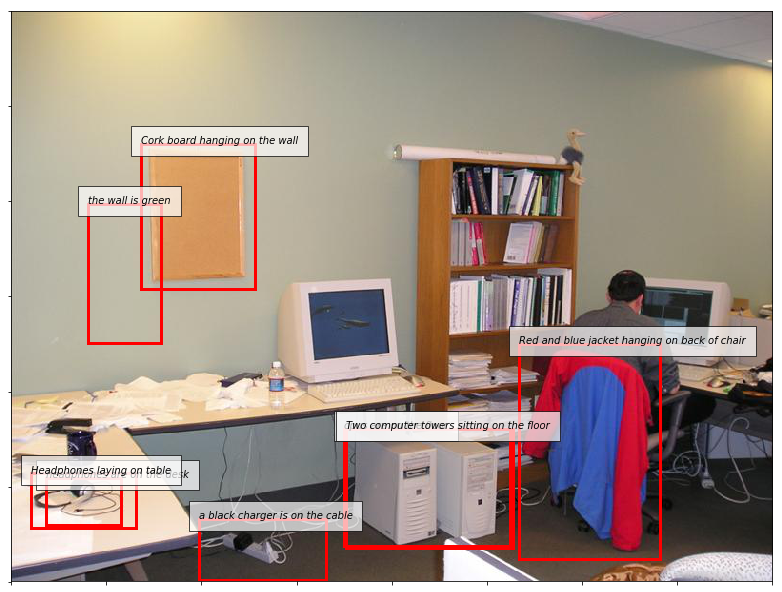

In [74]:
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
visualize_regions(image, regions[:8])